In [10]:
import pandas as pd
import random as rdm
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 12,9

### График 1-3

По просьбе коллег, были собраны данные(данные не парсил, а скопировал вручную из разных источников, ибо сроки диплома поджимают ;) и проанализированы несколько компаний, для выявления их прибыльности за определенный период. Задача не сложная с точки зрения анализа, т.к данных мало, однако для отработки графиков-примитивов, думаю, подойдет.

In [2]:
company1 = 'ООО "ТРАНСНЕФТЬ-ЛОГИСТИКА"'

In [25]:
trans_log = pd.read_csv('transneft`-logistika.txt', index_col=0)
trans_log

,тыс.руб.
год,
2012,327478
2013,591424
2014,349193
2015,53954
2016,80144
2017,126189
2018,255059


In [6]:
trans_log.columns = ['тыс.руб.']

In [8]:
trans_logk =  trans_log['тыс.руб.']/1000
trans_logk.round(0)

год
2012    327.0
2013    591.0
2014    349.0
2015     54.0
2016     80.0
2017    126.0
2018    255.0
Name: тыс.руб., dtype: float64

Text(0, 0.5, 'год')

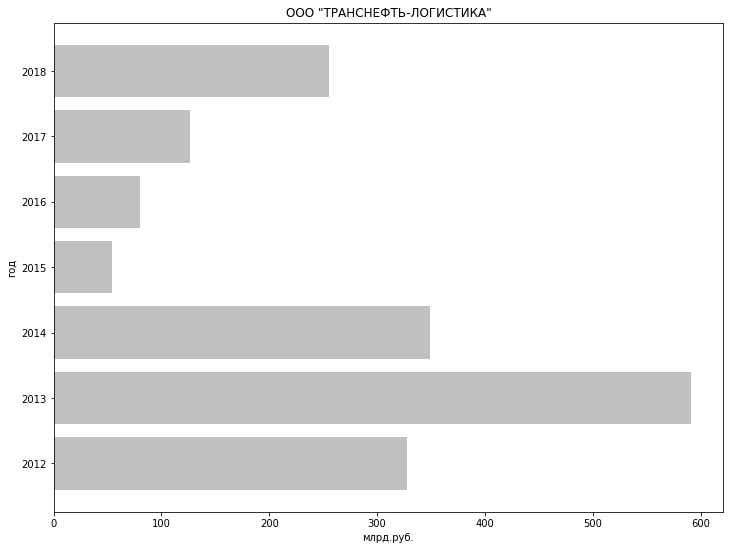

In [11]:
plt.barh(trans_log.index, trans_log['тыс.руб.']/1000, color='silver')
plt.title(company1)
plt.xlabel('млрд.руб.')
plt.ylabel('год')

In [12]:
company2 = 'ПАО "ТРАНСНЕФТЬ"'

In [13]:
transneft = pd.read_csv('transneft`.txt', index_col=0)
transneft

,тыс.руб.
год,
2007,4018463
2008,3681621
2009,3893243
2010,4893532
2011,11141791
2012,10652444
2013,11260439
2014,11783833
2015,12801410


<BarContainer object of 12 artists>

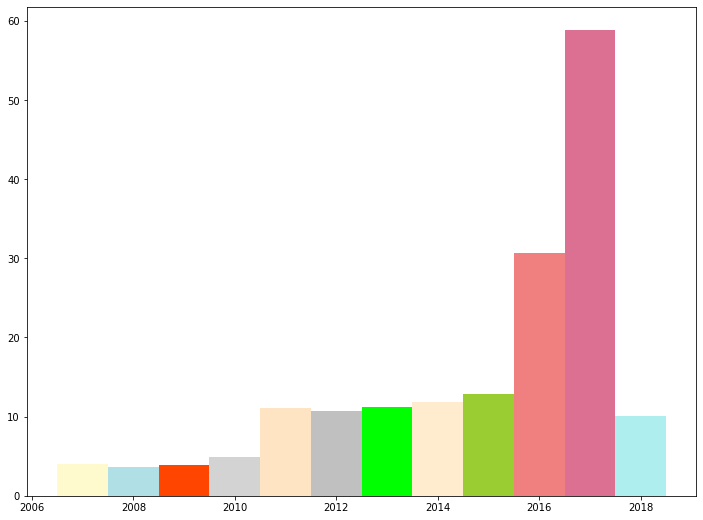

In [14]:
all_colors = list(plt.cm.colors.cnames.keys())
n = len(transneft.index)
c = rdm.choices(all_colors, k=n)
plt.bar(transneft.index, transneft['тыс.руб.']/1000000, color=c, width=1)

In [15]:
company3 = 'ПАО "НЕФТЯНАЯ КОМПАНИЯ "РОСНЕФТЬ"'

In [16]:
rosneft = pd.read_csv('rosneft`.txt', index_col=0)
rosneft

,тыс.руб.
год,
2011,236747308
2012,297983692
2013,137305207
2014,501676298
2015,239413255
2016,99236214
2017,138968980
2018,460784009


In [23]:
all_company = transneft.merge(rosneft, on = 'год', how = 'outer').merge(trans_log, on = 'год', how = 'outer')/1000000
all_company

,тыс.руб._x,тыс.руб._y,тыс.руб.
год,,,
2007,4.018463,NaN,NaN
2008,3.681621,NaN,NaN
2009,3.893243,NaN,NaN
2010,4.893532,NaN,NaN
2011,11.141791,236.747308,NaN
2012,10.652444,297.983692,0.327478
2013,11.260439,137.305207,0.591424
2014,11.783833,501.676298,0.349193
2015,12.801410,239.413255,0.053954


In [26]:
all_company.columns = company2, company3, company1
all_company

,"ПАО ""ТРАНСНЕФТЬ""","ПАО ""НЕФТЯНАЯ КОМПАНИЯ ""РОСНЕФТЬ""","ООО ""ТРАНСНЕФТЬ-ЛОГИСТИКА"""
год,,,
2007,4.018463,NaN,NaN
2008,3.681621,NaN,NaN
2009,3.893243,NaN,NaN
2010,4.893532,NaN,NaN
2011,11.141791,236.747308,NaN
2012,10.652444,297.983692,0.327478
2013,11.260439,137.305207,0.591424
2014,11.783833,501.676298,0.349193
2015,12.801410,239.413255,0.053954


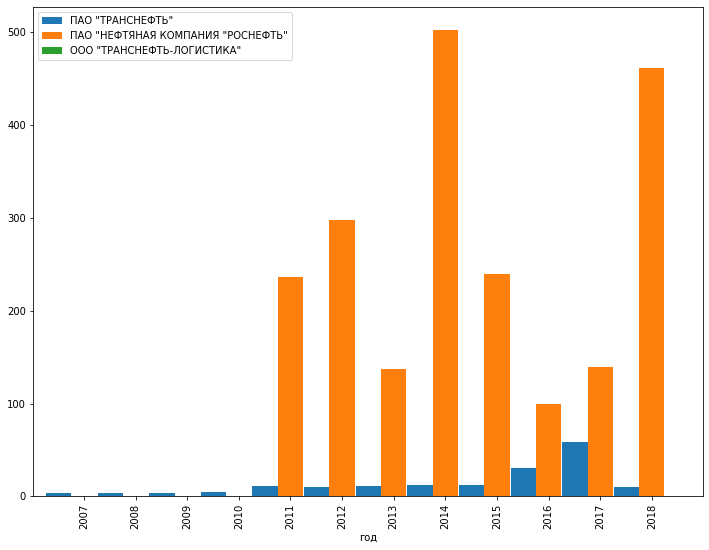

In [38]:
all_company.plot(kind='bar', width=1.47)

#### Выводы

Динамика чистой прибыли всех компаний исключительно положительная
Уровень прибыли логистической компании абсолютно не соразмерен с нефтеными

### График 4,5 

Проанализировать подборку своих фильмом с кинопоиска с БД 280000 пользователей https://grouplens.org/datasets/movielens/).

Выявить свои самые популярные жанры и сравнить с популярными жанрами БД.
##### Основные предположение до построение: 
- Мой самый популярный жанр - Драма
- Популярные жанры пользователей отлиются от моих, за исключением "Драмы"